# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [7]:
# Calculate the mean number of housing units per year (hint: use groupby) 
yearly_avg_units = sfo_data['housing_units'].groupby('year').mean()
yearly_avg_units

year
2010    372560.0
2011    374507.0
2012    376454.0
2013    378401.0
2014    380348.0
2015    382295.0
2016    384242.0
Name: housing_units, dtype: float64

In [8]:
# Save the dataframe as a csv file
output_data_file = 'yearly_avg_units.csv'
yearly_avg_units.to_csv(output_data_file)

In [9]:
# Use the min, max, and std to scale the y limits of the chart
yearly_avg_units.describe()

count         7.000000
mean     378401.000000
std        4206.000713
min      372560.000000
25%      375480.500000
50%      378401.000000
75%      381321.500000
max      384242.000000
Name: housing_units, dtype: float64

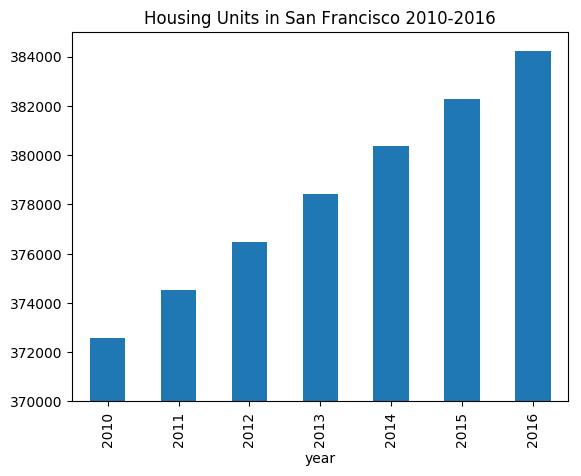

In [12]:
# Use the Pandas plot function to plot the average housing units per year.
yearly_avg_units.plot(kind='bar', ylim=[370000, 385000], title='Housing Units in San Francisco 2010-2016')


- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [8]:
# Calculate the average sale price per square foot and average gross rent
sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


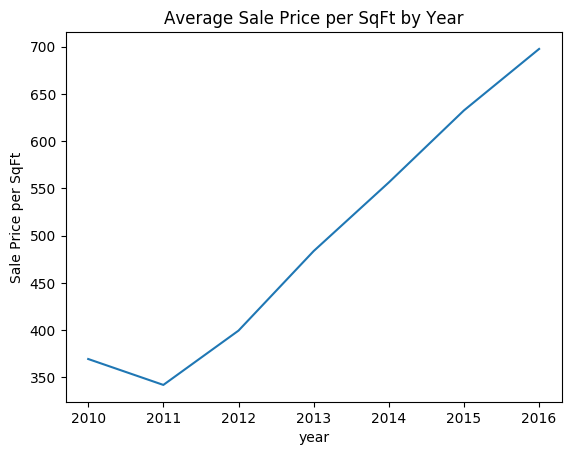

In [9]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
price_plot = sfo_data['sale_price_sqr_foot'].groupby('year').mean()
price_plot.plot(ylabel='Sale Price per SqFt', title='Average Sale Price per SqFt by Year')

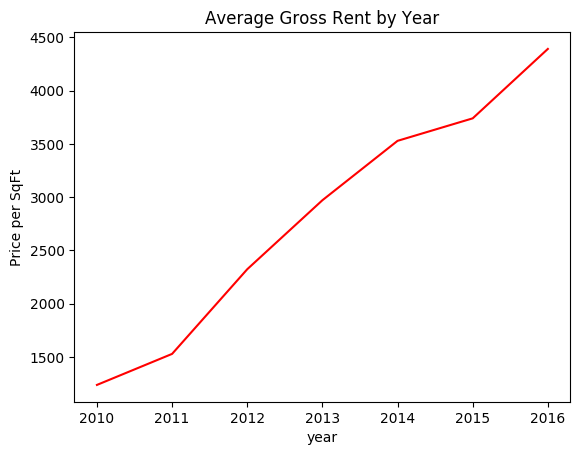

In [11]:
# Line chart for average gross rent per square foot
rent_plot = sfo_data['gross_rent'].groupby('year').mean()
rent_plot.plot(ylabel='Price per SqFt', title='Average Gross Rent by Year', color='red')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [ ]:
# Group by year and neighborhood and then create a new dataframe of the mean values


In [ ]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood


In [ ]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [4]:
# Getting the data from the top 10 expensive neighborhoods to own
top_10 = sfo_data.groupby('neighborhood').mean().nlargest(10, 'sale_price_sqr_foot').reset_index()
top_10

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [5]:
# Plotting the data from the top 10 expensive neighborhoods
top_11 = top_10.drop(columns=['neighborhood', 'housing_units', 'gross_rent'])
top_11

,sale_price_sqr_foot
0,903.993258
1,788.844818
2,779.810842
3,689.555817
4,687.087575
5,676.506578
6,675.350212
7,665.964042
8,662.013613
9,650.124479


In [6]:
top_11.hvplot()

:Curve   [index]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [ ]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# YOUR CODE HERE!

In [ ]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [67]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_data = pd.read_csv(file_path)
neighborhood_data = neighborhood_data.rename(columns={'Neighborhood': 'neighborhood'}).set_index('neighborhood')
neighborhood_data

,Lat,Lon
neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
...,...,...
West Portal,37.740260,-122.463880
Western Addition,37.792980,-122.435790
Westwood Highlands,37.734700,-122.456854


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [51]:
# Calculate the mean values for each neighborhood
sfon = sfo_data.groupby('neighborhood').mean()


sale_price_sqr_foot    0
housing_units          0
gross_rent             0
dtype: int64

In [68]:
weird1 = sfon[sfon.index.isin(neighborhood_data.index)]
weird1

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.00,2817.285714
Anza Vista,373.382198,379050.00,3031.833333
Bayview,204.588623,376454.00,2318.400000
Bayview Heights,590.792839,382295.00,3739.000000
Buena Vista Park,452.680591,378076.50,2698.833333
...,...,...,...
West Portal,498.488485,376940.75,2515.500000
Western Addition,307.562201,377427.50,2555.166667
Westwood Highlands,533.703935,376454.00,2250.500000


In [83]:
# Join the average values with the neighborhood locations
sfo_location = pd.concat([neighborhood_data, sfon], axis=1)
sfo_location

,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,,
Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN
...,...,...,...,...,...
Yerba Buena,37.792980,-122.396360,576.709848,377427.5,2555.166667
Bernal Heights,NaN,NaN,576.746488,379374.5,3080.333333
Downtown,NaN,NaN,391.434378,378401.0,2817.285714


In [54]:
# 4 rows added in concatenation, what is happening? Print concatenated dataframe to examine
output_data_file = 'concatenated.csv'
sfo_location.to_csv(output_data_file)

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

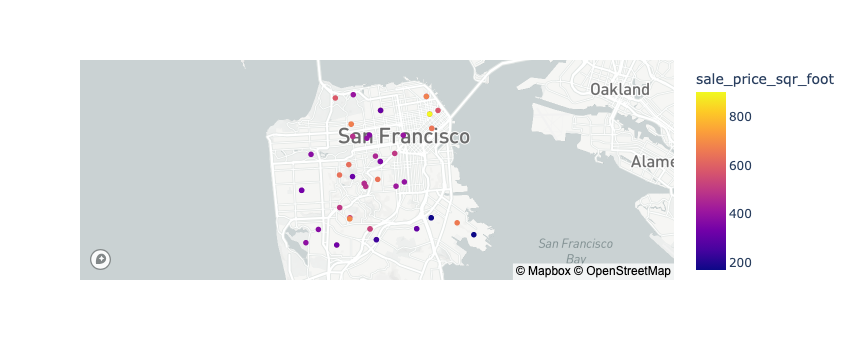

In [97]:
sfo_location = sfo_location.dropna()

# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    sfo_location,
    lat="Lat",
    lon="Lon",
    hover_name=sfo_location.index,
    color='sale_price_sqr_foot',
    zoom=10
)

# Display the map
map_plot.show()

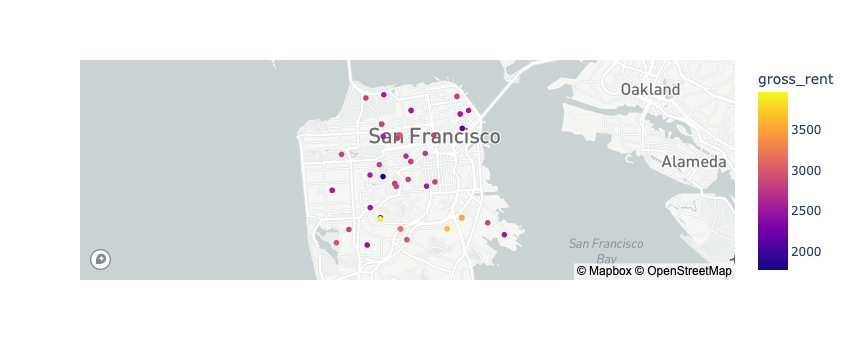

In [98]:
map_plot = px.scatter_mapbox(
    sfo_location,
    lat="Lat",
    lon="Lon",
    hover_name=sfo_location.index,
    color='gross_rent',
    zoom=10
)

# Display the map
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [7]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

NameError: name 'df_costs' is not defined

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [ ]:
# Parallel Categories Plot
# YOUR CODE HERE!

In [ ]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [ ]:
# Sunburst Plot
# YOUR CODE HERE!